In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Importing the packages/librairies:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from glob import glob
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import warnings
warnings.filterwarnings('ignore')

### Preprocessing operations :

In [4]:
#glob function will create a list with all the paths, os.path.basename(x) : x will take the last portion of the path which is the name of the image :

path_to_train_test = {os.path.basename(x): x for x in 
                      glob(os.path.join('..', 'input', 'covid19-image-dataset', 'Covid19-dataset', '*'))}
print(path_to_train_test)

path_to_labels = {os.path.basename(x): x for x in 
                  glob(os.path.join('..', 'input', 'covid19-image-dataset', 'Covid19-dataset', 'test', '*'))}
print(path_to_labels)

#paths of data
path_train = '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'
path_test = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test'

{}
{}


In [5]:
#names of classes :
name_classes = os.listdir('/kaggle/input/covid19-image-dataset/Covid19-dataset/train') #os.listdir allow us to extract all the files in the specified path
print(name_classes)

FileNotFoundError: [WinError 3] The system cannot find the path specified: '/kaggle/input/covid19-image-dataset/Covid19-dataset/train'

### Exploring Chest X-ray Data with Image Visualization

In [ ]:
# Example for Covid X-rays:
print(path_train) # Path to train
image_path = path_train + '/' + 'Covid' # Acces to one of the classes, here we chose : 'Covid'
print(image_path) # Path to Covid
image_in_folder = os.listdir(image_path) # Using os.listdir to extract all the elements located in 'Covid'
print(image_in_folder) # Print contents inside 'Covid'
first_image = image_in_folder[0]
print('First Image :', first_image) #Choose an image
first_image_path = image_path + '/' + first_image
print(first_image_path)

img_input = '/kaggle/input/covid19-image-dataset/Covid19-dataset/test/Covid/0120.jpg' #insert image path
img = image.load_img(img_input)
plt.imshow(img)

/kaggle/input/covid19-image-dataset/Covid19-dataset/train
/kaggle/input/covid19-image-dataset/Covid19-dataset/train/Covid
['032.jpeg', '01.jpeg', 'COVID-00014.jpg', '080.jpg', '060.jpeg', '092.png', 'COVID-00005.jpg', 'COVID-00031.jpg', '059.jpeg', '067.jpg', '044.jpeg', 'COVID-00037.jpg', '069.jpg', '089.jpg', '076.jpg', 'COVID-00032.jpg', 'COVID-00027.jpg', '058.jpeg', '050.jpeg', '03.jpeg', '02.jpeg', 'COVID-00003a.jpg', '056.jpg', '033.png', 'COVID-00016.jpg', 'COVID-00017.jpg', 'COVID-00022.jpg', '09.png', '088.jpeg', '068.jpg', 'COVID-00034.jpg', '064.jpg', 'COVID-00029.jpg', '015.jpg', 'COVID-00030.jpg', '054.jpeg', '086.jpg', '052.jpeg', 'COVID-00007.jpg', 'COVID-00025.jpg', '084.jpeg', '079.jpeg', '042.jpeg', 'COVID-00038.jpg', 'COVID-00003b.jpg', '041.jpeg', 'COVID-00026.jpg', '057.jpeg', '021.jpeg', 'COVID-00001.jpg', '027.jpeg', '046.jpeg', 'COVID-00028.jpg', '039.jpeg', '071.jpg', '08.jpeg', 'COVID-00009.jpg', '062.jpeg', 'COVID-00024.jpg', '045.jpeg', 'COVID-00018.jpg', '

In [ ]:
#function to show one image each class
def plot_image(name_classes):
    plt.figure(figsize = (12,12))
    
    for i, category in enumerate(name_classes):
        image_path = path_train + '/' + category
        images_in_folder = os.listdir(image_path)
        
        first_image = images_in_folder[0]
        first_image_path = image_path + '/' + first_image
        
        img = image.load_img(first_image_path)
        img_array = image.img_to_array(img) / 255
        
        plt.subplot(1, 3, i + 1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

In [ ]:
plot_image(name_classes)

In [ ]:
directory_train_for_Covid = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Covid', '*' ))}
directory_train_for_Normal = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Normal', '*' ))}
directory_train_for_VP = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'train', 'Viral Pneumonia', '*' ))}

print(' \n Number of images for Covid : {} \n Number of images for Normal : {} \n Number of images for Viral Pneumonia : {}'
          .format(len(directory_train_for_Covid), len(directory_train_for_Normal), len(directory_train_for_VP)))
total_train_images = len(directory_train_for_Covid) + len(directory_train_for_Normal) + len(directory_train_for_VP)
print('Total Images for Train :', total_train_images)

 
 Number of images for Covid : 111 
 Number of images for Normal : 70 
 Number of images for Viral Pneumonia : 70
Total Images for Train : 251


In [ ]:
directory_test_for_Covid = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Covid', '*' ))}
directory_test_for_Normal = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Normal', '*' ))}
directory_test_for_VP = {os.path.basename(x) : x for x in glob(os.path.join('..','input', 'covid19-image-dataset', 'Covid19-dataset', 'test', 'Viral Pneumonia', '*' ))}

print(' \n Number of images for Covid : {} \n Number of images for Normal : {} \n Number of images for Viral Pneumonia : {}'
          .format(len(directory_test_for_Covid), len(directory_test_for_Normal), len(directory_test_for_VP)))
total_test_images = len(directory_test_for_Covid) + len(directory_test_for_Normal) + len(directory_test_for_VP)
print('Total Images for Test :', total_test_images)

 
 Number of images for Covid : 26 
 Number of images for Normal : 20 
 Number of images for Viral Pneumonia : 20
Total Images for Test : 66


In [ ]:
print('Total Images :', (total_train_images+total_test_images))

Total Images : 317


In [ ]:
data_generator = ImageDataGenerator(rescale = 1/255)

In [ ]:
#train data generator
train_data = data_generator.flow_from_directory(path_train,
                                                target_size = (224, 224),
                                                batch_size = 16
                                               )

Found 251 images belonging to 3 classes.


In [ ]:
#test data generator
test_data = data_generator.flow_from_directory(path_test,
                                                target_size = (224, 224),
                                                batch_size = 1
                                               )

Found 66 images belonging to 3 classes.


### CNN Keras/Tensorflow Librairies/Packages :

In [ ]:
import random
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dropout, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
def GetPixels(train_test_data):

    #train data generator
    train_data_example = data_generator.flow_from_directory(path_train,
                                                target_size = (28, 28),
                                                batch_size = 16
                                                   )
    random_image_selected = np.random.randint(0,11)
    images, labels = next(train_data_example) # Get a batch of images and labels
    COLOR2GRAY = np.mean(images[random_image_selected], axis=-1)
    
    plt.figure(figsize=(15,8))
    plt.imshow(COLOR2GRAY)
    print('Dimension of the Image:', str(COLOR2GRAY.shape))
    
    for i in range(28):
        for j in range(28):
            plt.text(i, j, round(COLOR2GRAY[i,j],1),fontsize=8, color='lime', ha='center', va='center')
            
    plt.show()

GetPixels(train_data)

Found 251 images belonging to 3 classes.
Dimension of the Image: (28, 28)


### Mathematics behind CNN :

In [ ]:
#Medical Intelligence Assistance For Chest X-Ray Diagnostic (MAICXD):
model = tf.keras.models.Sequential(name='MAICXDNet', 
                layers= [
                        #Layer 1:
                        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='valid', data_format=None, 
                                              activation = 'relu', input_shape=(224,224,3)),
                        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None),
                        
                            #Layer 2:
                            tf.keras.layers.Conv2D(filters=68, kernel_size=(3,3), padding='valid', data_format=None, 
                                              activation = 'relu'),
                            tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=None),

                                #Flattened Layer:
                                tf.keras.layers.Flatten(),

                                    #Dense Layer (Fully-Connected):
                                    tf.keras.layers.Dense(units=3, activation='softmax')
                    ])

model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_fit = model.fit(train_data, epochs=3, validation_data=test_data, callbacks=None)

Epoch 1/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 13s 582ms/step - accuracy: 0.4498 - loss: 2.5051 - val_accuracy: 0.7121 - val_loss: 0.6035
Epoch 2/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 503ms/step - accuracy: 0.9103 - loss: 0.3090 - val_accuracy: 0.7879 - val_loss: 0.3480
Epoch 3/3
16/16 ━━━━━━━━━━━━━━━━━━━━ 10s 498ms/step - accuracy: 0.9132 - loss: 0.2189 - val_accuracy: 0.7879 - val_loss: 0.4995


In [ ]:
loss, accuracy = model.evaluate(test_data)
print('Loss : {:.2f}, Accuracy: {:.2f}'.format(loss, accuracy))

66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8284 - loss: 0.4044
Loss : 0.50, Accuracy: 0.79


<Figure size 1000x800 with 0 Axes>

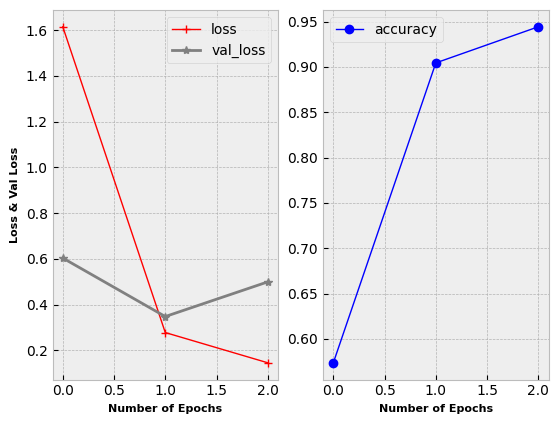

In [ ]:
#Performance (History):
plt.figure(figsize=(10,8))
plt.style.use('bmh')
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharey=False, sharex=False)

#Loss & Validation Loss:
ax1.plot(model_fit.history['loss'], label='loss', color='red', marker='+', lw=1)
ax1.plot(model_fit.history['val_loss'], label='val_loss', color='grey', marker='*')
ax1.set_xlabel('Number of Epochs', fontsize=8, fontweight='bold')
ax1.set_ylabel('Loss & Val Loss', fontsize=8, fontweight='bold')
ax1.legend()
#Accuracy:
ax2.plot(model_fit.history['accuracy'], label='accuracy', color='blue', marker='o', lw=1)
ax2.set_xlabel('Number of Epochs', fontsize=8, fontweight='bold')
ax2.legend()

In [ ]:
train_data.class_indices.items()

dict_items([('Covid', 0), ('Normal', 1), ('Viral Pneumonia', 2)])

In [ ]:
print(train_data.class_indices.items())
class_dict = dict([value, key] for key, value in train_data.class_indices.items())
class_dict

dict_items([('Covid', 0), ('Normal', 1), ('Viral Pneumonia', 2)])


{0: 'Covid', 1: 'Normal', 2: 'Viral Pneumonia'}

In [ ]:
from tensorflow.keras.preprocessing import image

def prediction(Drop_XRAY_Here, actual_label, model, class_dict):
    """
    Function to make prediction on X-Ray image and display the result with the probability.
    
    Args:
    Drop_XRAY_Here (str): Path to the X-Ray image to be predicted.
    actual_label (str): Actual label of the image (used for comparison).
    model (keras.Model): The trained CNN model used for prediction.
    class_dict (dict): Dictionary mapping class indices to class labels.
    """
    # Charger et prétraiter l'image
    testing_img = image.load_img(Drop_XRAY_Here, target_size=(224, 224))  #Load the image
    test_img_array = image.img_to_array(testing_img) / 255  #Normalization
    
    #Reshape : (batch_size, height, width, channels))
    test_img_input = test_img_array.reshape(1, test_img_array.shape[0],
                                           test_img_array.shape[1],
                                           test_img_array.shape[2])
    
    #Prediction :
    prediction_array = model.predict(test_img_input)
    
    #Predict the class and the associated probability :
    predicted_class = np.argmax(prediction_array)  #Predicted Class
    predicted_img = class_dict[predicted_class]  
    predicted_prob = float(prediction_array[0][predicted_class] * 100)  #Probability of the Class in percentage
    
    plt.figure(figsize=(4, 4))
    plt.imshow(test_img_array)
    plt.title('Actual Label: {}, Predicted Label: {}\nProbability: {:.2f}%'.format(actual_label, predicted_img, predicted_prob), 
             fontsize=10)
    
    plt.grid(False)  # No Grid
    plt.axis('off')  # No Axes
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


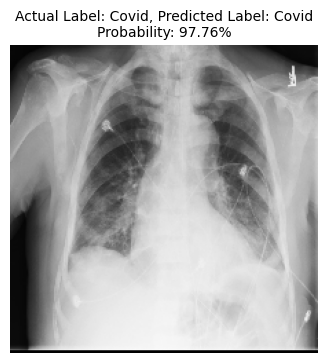

In [ ]:
Drop_XRAY_Here = '/kaggle/input/test-images/00000011_004.png'  #Image Path
prediction(Drop_XRAY_Here, 
           actual_label='Covid', 
           model=model, 
           class_dict=class_dict
          ) # Predictor Function